## Recommendation System - Apriori Algorithm

Dataset Link - https://www.kaggle.com/rounakbanik/the-movies-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading Data containig details of the movies.

movie = pd.read_csv('Movie Dataset/movies_metadata.csv')
movie.head()

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
# Looking for missing data

movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
# Reading Data containg Ratings of the movies.

rate = pd.read_csv('Movie Dataset/ratings_small.csv')
rate.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
# Looking for missing data in Rating

rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


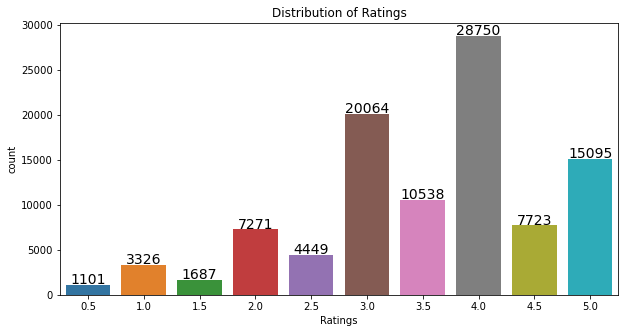

In [56]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=rate, x='rating')

labels = (rate['rating'].value_counts().sort_index())
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')

for i,v in enumerate(labels):
    ax.text(i, v+100, str(v), horizontalalignment='center', size=14, color='black')
plt.show()

This Rating distribution gives us an understanding that there are fewer movies that are rated low. This distribution is useful as we might not want to recommend movies which are rated very low.

### Removing missing data
There are few movie titles which has missing data, which serves no purpose. So, we removed those missing movie titles.

In [7]:
title_mask = movie['title'].isna()
movie = movie.loc[title_mask == False]

The <b>id feature</b> in movies_metadata is an object datatype so to merge the features into the ratings_small dataset, the datatype needs to be <b> int </b>

In [8]:
# Changing the datatype of the id feature.

movie = movie.astype({'id': 'int64'})

In [9]:
# Merging the id and the title of the movie with the rating dataset.

df1 = pd.merge(rate, movie[['id', 'title']], left_on='movieId', right_on='id')
df1.head()

,userId,movieId,rating,timestamp,id,title
0,1,1371,2.5,1260759135,1371,Rocky III
1,4,1371,4.0,949810302,1371,Rocky III
2,7,1371,3.0,851869160,1371,Rocky III
3,19,1371,4.0,855193404,1371,Rocky III
4,21,1371,3.0,853852263,1371,Rocky III


In [10]:
# Since id is repeated and the timestamp is not required for this problem it is dropped.

df1.drop(['timestamp', 'id'], axis=1, inplace=True)

In [11]:
df1.head(5)

,userId,movieId,rating,title
0,1,1371,2.5,Rocky III
1,4,1371,4.0,Rocky III
2,7,1371,3.0,Rocky III
3,19,1371,4.0,Rocky III
4,21,1371,3.0,Rocky III


For the apriori model to work a new dataframe needs to be created which will contain the <b>movie title as the new features (columns) and userID as the index (rows)</b>

In [12]:
# Dropping the duplicates

df1 = df1.drop_duplicates(['userId','title'])

By using the <b>pivot function</b> we get a dataframe which contains <b>1</b> in the columns for the movies a user has watched and <b>0</b> otherwise.

In [13]:
new_df = df1.pivot(index = 'userId', columns = 'title', values = 'rating').fillna(0)

In [14]:
new_df.head(5)

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
len(new_df)

671

In [16]:
# Converting the ratings to 0's and 1's and also converting the float values

new_df = new_df.astype('int64')

In [17]:
def encode_ratings(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
    
new_df = new_df.applymap(encode_ratings)

### This view gives us a clear understanding which user has watched what movie precisely.

In [18]:
new_df.head()

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


$$Support(M) = User Watchlists contains M / User Watchlists$$ <br>
<b>Support</b> computes, out of the total users, how much percentage of users have movie M1 in their watchlist. <br>
<b> Support </b> means probability that a user will watch Movie M1. 

<b>M1</b> can be a single movie or multiple movies.



$$Confidence (M1 -> M2) = User Watchlist contains M1 and M2 / User watchlist contain M1$$ <br>
<b>Confidence</b> of a movie is out of the total users having watched movie M1, how many have also watched movie M2.<br>

$$ Lift (M1 -> M2) = Confidence(M1->M2) / Support(M2) $$ <br>
<b>Lift</b> is the measure of increase in likelihood of users watching the movie M2 when we recommend it to the subset than when we recommend it to entire population. <br>
So a high lift suggests there is some relation between the two movies and most of the users who have watched movie M1 are also likely to watch movie M2.

In [19]:
!pip install mlxtend

In [20]:
# Using the apriori Model 'support' is calculated

from mlxtend.frequent_patterns import apriori

frequent_movies = apriori(new_df, min_support=0.07, use_colnames = True)

In [50]:
frequent_movies.head()

,support,itemsets
0,0.129657,"(20,000 Leagues Under the Sea)"
1,0.129657,(2001: A Space Odyssey)
2,0.298063,(48 Hrs.)
3,0.292101,(5 Card Stud)
4,0.093890,(A Brief History of Time)


In [22]:
# Using the association_rule for calculating the confidence and lift

from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_movies, metric="lift", min_threshold=1)

In [23]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(20,000 Leagues Under the Sea)",(48 Hrs.),0.129657,0.298063,0.076006,0.586207,1.966724,0.037360,1.696349
1,(48 Hrs.),"(20,000 Leagues Under the Sea)",0.298063,0.129657,0.076006,0.255000,1.966724,0.037360,1.168245
2,"(20,000 Leagues Under the Sea)",(A Nightmare on Elm Street),0.129657,0.266766,0.081967,0.632184,2.369807,0.047379,1.993480
3,(A Nightmare on Elm Street),"(20,000 Leagues Under the Sea)",0.266766,0.129657,0.081967,0.307263,2.369807,0.047379,1.256382
4,"(20,000 Leagues Under the Sea)",(Back to the Future Part II),0.129657,0.210134,0.077496,0.597701,2.844379,0.050251,1.963381


### Interpreting the Result

In [24]:
# Sorting the result in descending order.

df2 = rules.sort_values(by=['lift'], ascending = False)
df2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
70960,(On Guard),"(Muxmäuschenstill, The Garden of Eden)",0.087928,0.099851,0.070045,0.796610,7.977991,0.061265,4.425733
70957,"(Muxmäuschenstill, The Garden of Eden)",(On Guard),0.099851,0.087928,0.070045,0.701493,7.977991,0.061265,3.055440
197237,"(Big Fish, Rope)","(All the Way Boys, Psycho)",0.092399,0.095380,0.070045,0.758065,7.947833,0.061232,3.739096
197232,"(All the Way Boys, Psycho)","(Big Fish, Rope)",0.095380,0.092399,0.070045,0.734375,7.947833,0.061232,3.416849
2541136,"(48 Hrs., Cockles and Muscles, A Nightmare on ...","(Sissi, Rain Man, Back to the Future Part II, ...",0.093890,0.098361,0.071535,0.761905,7.746032,0.062300,3.786885
2541061,"(Sissi, Rain Man, Back to the Future Part II, ...","(48 Hrs., Cockles and Muscles, A Nightmare on ...",0.098361,0.093890,0.071535,0.727273,7.746032,0.062300,3.322404
197236,"(Psycho, Rope)","(All the Way Boys, Big Fish)",0.098361,0.093890,0.070045,0.712121,7.584656,0.060810,3.147541
197233,"(All the Way Boys, Big Fish)","(Psycho, Rope)",0.093890,0.098361,0.070045,0.746032,7.584656,0.060810,3.550205
2541132,"(Back to the Future Part II, Rain Man, Monsoon...","(48 Hrs., Cockles and Muscles, A Nightmare on ...",0.104322,0.090909,0.071535,0.685714,7.542857,0.062051,2.892562
2541065,"(48 Hrs., Cockles and Muscles, A Nightmare on ...","(Back to the Future Part II, Rain Man, Monsoon...",0.090909,0.104322,0.071535,0.786885,7.542857,0.062051,4.202797


In [25]:
# Function to find out recommended movies.

def recommend_movies(m):
    d = df2[df2['antecedents'].apply(lambda x: len(x) == 1 and next(iter(x)) == m)]
    return d

In [52]:
m = recommend_movies('Men in Black II') # Passing the name of the movie in 'antecedents'

movies = m['consequents'].values
movie_list = []
for movie in movies:
    for title in movie:
        if title not in movie_list:
            movie_list.append(title)

# Viewing the recommended movies
print("The Recommended Movies:")
movie_list[:10]

The Recommended Movies:


['Nostalgia',
 'Terminator 3: Rise of the Machines',
 'Jarhead',
 'Sleepless in Seattle',
 'The Talented Mr. Ripley',
 'Young and Innocent',
 'Point Break',
 'The 39 Steps',
 'Once Were Warriors',
 'The Thomas Crown Affair']

## Simple Recommender System

Dataset Link: https://www.kaggle.com/sankha1998/tmdb-top-10000-popular-movies-dataset

In [27]:
# Reading the data

mdata = pd.read_csv("Dataset/TMDb_updated.csv")
mdata.head()

,id,title,overview,original_language,vote_count,vote_average
0,0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


In [28]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   overview           9970 non-null   object 
 3   original_language  10000 non-null  object 
 4   vote_count         10000 non-null  int64  
 5   vote_average       10000 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


In [29]:
# Looking into records containing no overview

mdata[mdata['overview'].isna()]

,id,title,overview,original_language,vote_count,vote_average
98,98,Recep İvedik 6,NaN,tr,21,4.4
394,394,Arjona Circo Soledad en Vivo,NaN,es,0,0.0
644,644,Ustica: The Missing Paper,NaN,it,26,5.6
696,696,Autonomes,NaN,fr,0,0.0
769,769,Tout nous sourit,NaN,fr,0,0.0
998,998,Vivre sans eux,NaN,fr,0,0.0
1438,1438,La noche mágica,NaN,es,0,0.0
1582,1582,The Water Monster,NaN,zh,1,10.0
1631,1631,The Lion,NaN,fr,18,4.6
1650,1650,Mucize 2: Aşk,NaN,tr,1,8.0


In [30]:
# Checking the number of missing data.

mdata['overview'].isna().sum() 

30

In [31]:
# Replacing the null values with blank spaces.

mdata['overview'] = mdata.overview.replace(np.NaN," ")

### Exploratory Data Analysis

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='original_language', ylabel='vote_count'>

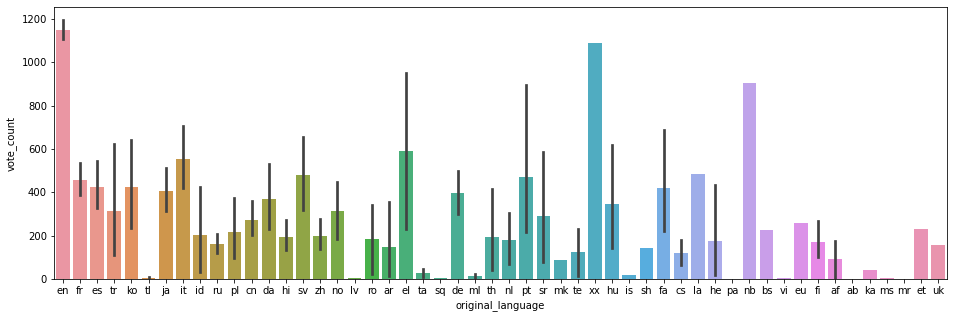

In [32]:
# Plot for Languages and vote count.

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot('original_language','vote_count',data = mdata)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote_average'>

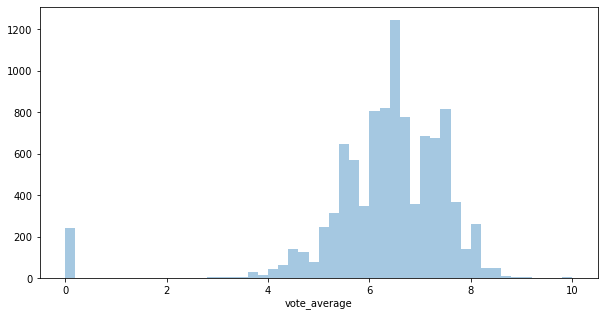

In [33]:
# Ploting voting average of the movies

fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(mdata['vote_average'], kde = None)

In [34]:
# Converting the overview data into lowercase

mdata['overview'] = mdata['overview'].apply(lambda x:x.lower()) 

### Text Vectorization
Converting the text into vectors

In [35]:
mdata.head()

,id,title,overview,original_language,vote_count,vote_average
0,0,Ad Astra,"the near future, a time when both hope and har...",en,2853,5.9
1,1,Bloodshot,"after he and his wife are murdered, marine ray...",en,1349,7.2
2,2,Bad Boys for Life,marcus and mike are forced to confront new thr...,en,2530,7.1
3,3,Ant-Man,armed with the astonishing ability to shrink i...,en,13611,7.1
4,4,Percy Jackson: Sea of Monsters,"in their quest to confront the ultimate evil, ...",en,3542,5.9


In [36]:
# Importing the CountVectorizer 

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words = 'english')

In [37]:
vectors = cv.fit_transform(mdata['overview']).toarray()

In [38]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
# Converting the vectorized data into a dataframe containing the movie title in y-axis along with the feature names as columns.

vector_matrix = pd.DataFrame(vectors, columns = cv.get_feature_names())
vector_matrix.index = mdata['title']

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
vector_matrix

,000,007,10,100,11,12,12th,13,14,15,...,youths,zach,zealand,zero,zeus,zoe,zombie,zombies,zone,zoo
title,,,,,,,,,,,,,,,,,,,,,
Ad Astra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bloodshot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bad Boys for Life,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ant-Man,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percy Jackson: Sea of Monsters,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cargo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Good Night,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The World Is Yours,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Viewing all the most frequent words
cv.get_feature_names()

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '12th',
 '13',
 '14',
 '15',
 '16',
 '16th',
 '17',
 '17th',
 '18',
 '18th',
 '19',
 '1920s',
 '1930s',
 '1940s',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1950s',
 '1960s',
 '1962',
 '1965',
 '1969',
 '1970s',
 '1971',
 '1973',
 '1974',
 '1978',
 '1980',
 '1980s',
 '1984',
 '1990',
 '1990s',
 '1994',
 '1999',
 '19th',
 '20',
 '200',
 '2000',
 '2008',
 '2009',
 '2013',
 '2016',
 '20th',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '25',
 '30',
 '300',
 '35',
 '3d',
 '40',
 '400',
 '50',
 '500',
 '60',
 '60s',
 '70',
 'aaron',
 'abandoned',
 'abby',
 'abducted',
 'abilities',
 'ability',
 'able',
 'aboard',
 'abroad',
 'absence',
 'abuse',
 'abused',
 'abusive',
 'academic',
 'academy',
 'accept',
 'accepted',
 'accepts',
 'access',
 'accident',
 'accidental',
 'accidentally',
 'acclaimed',
 'accompanied',
 'accompanies',
 'accomplish',
 'accomplished',
 'account',
 'accountant',
 'accused',
 'ace',
 'achieve',
 'acquaintances',
 'act',
 'acti

### Cosine Similarity
We need to find the cosine similarities between the vectors. Closer the vectors to each other higher is the similarity.
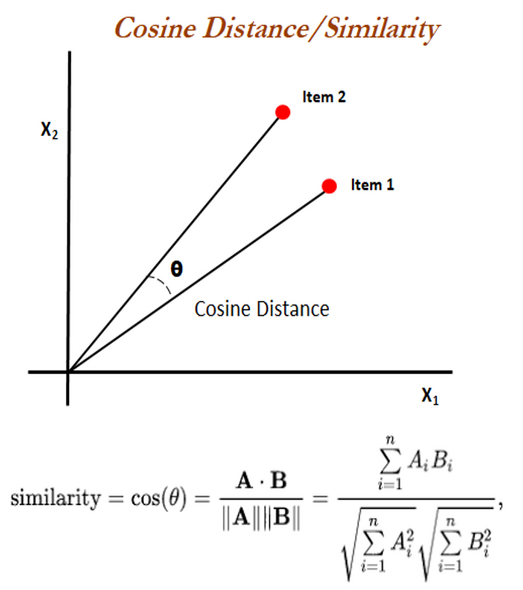

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

# Caclulating the similarity between the vectors
similarity = cosine_similarity(vectors)

In [43]:
# Generating the similarity matrix

similarity_matrix = pd.DataFrame(similarity, index = vector_matrix.index, columns = vector_matrix.index)
similarity_matrix.head()

title,Ad Astra,Bloodshot,Bad Boys for Life,Ant-Man,Percy Jackson: Sea of Monsters,Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn),Live Free or Die Hard,Cold Blood,Underwater,The Platform,...,Attack on Titan,Pokémon: The Rise of Darkrai,Eagle vs Shark,High Flying Bird,Zapped!,Cargo,The Good Night,The World Is Yours,The Grand Seduction,Woochi: The Demon Slayer
title,,,,,,,,,,,,,,,,,,,,,
Ad Astra,1.000000,0.033501,0.000000,0.000000,0.000000,0.000000,0.043033,0.000000,0.099381,0.096225,...,0.029348,0.132020,0.000000,0.000000,0.0,0.043033,0.035136,0.048113,0.029348,0.000000
Bloodshot,0.033501,1.000000,0.035533,0.030303,0.000000,0.000000,0.000000,0.037987,0.000000,0.000000,...,0.000000,0.000000,0.024376,0.110096,0.0,0.000000,0.000000,0.043519,0.000000,0.000000
Bad Boys for Life,0.000000,0.035533,1.000000,0.071067,0.048113,0.051031,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.028583,0.000000,0.0,0.000000,0.000000,0.051031,0.000000,0.000000
Ant-Man,0.000000,0.030303,0.071067,1.000000,0.000000,0.043519,0.000000,0.075974,0.000000,0.000000,...,0.000000,0.029854,0.024376,0.055048,0.0,0.000000,0.000000,0.000000,0.106186,0.055048
Percy Jackson: Sea of Monsters,0.000000,0.000000,0.048113,0.000000,1.000000,0.000000,0.052705,0.000000,0.000000,0.000000,...,0.000000,0.040423,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
sorted(list(enumerate(similarity[0])), reverse = True, key = lambda x:x[1])[1:6]

[(1461, 0.28867513459481287),
 (319, 0.25819888974716115),
 (8266, 0.25819888974716115),
 (628, 0.25717224993681986),
 (2283, 0.2501595914621521)]

In [45]:
# Function for recommending the movie

def recommend(movie):
    movie_index = mdata[mdata['title'] == movie].index[0]
    distance = similarity[movie_index]
    movie_list = sorted(list(enumerate(distance)), reverse = True, key = lambda x:x[1])[0:5]
    
    for i in movie_list:
        print(mdata.iloc[i[0]].title)

In [46]:
recommend('Rocky')

Rocky
Creed
Rocky V
The Fighter
Rocky Balboa
